In [16]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import seaborn as sns 
import itertools
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC


# from sklearn.externals import joblib

import joblib

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Slug\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Slug\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Slug\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Loading the dataset
df = pd.read_csv("amazon_reviews.csv")
df.head(5) #Displaying the first five rows of the dataset

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [18]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [19]:
df.dropna(subset=['reviewerName'], inplace=True)  # Drop rows with missing reviewerName
df['reviewText'].fillna('no review', inplace=True)  # Fill missing reviewText with 'no review'
df['sentiment'] = df['overall'].apply(lambda x: 'Neutral' if x == 3.0 else ('Negative' if x < 3.0 else 'Positive'))
df.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,sentiment
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,Positive
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,Positive
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,Positive
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,Positive
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0,Positive


In [20]:
df['year'], df['month'], df['date'] = df['reviewTime'].str.split('-', 2).str

df.drop(['reviewTime'], axis=1, inplace=True)
df.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,sentiment,year,month,date
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",409,0,0,0,0,0.0,0.0,Positive,2013,10,25
2,2,1K3,4.0,it works as expected. I should have sprung for...,715,0,0,0,0,0.0,0.0,Positive,2012,12,23
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,382,0,0,0,0,0.0,0.0,Positive,2013,11,21
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",513,0,0,0,0,0.0,0.0,Positive,2013,07,13
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,588,0,0,0,0,0.0,0.0,Positive,2013,04,29


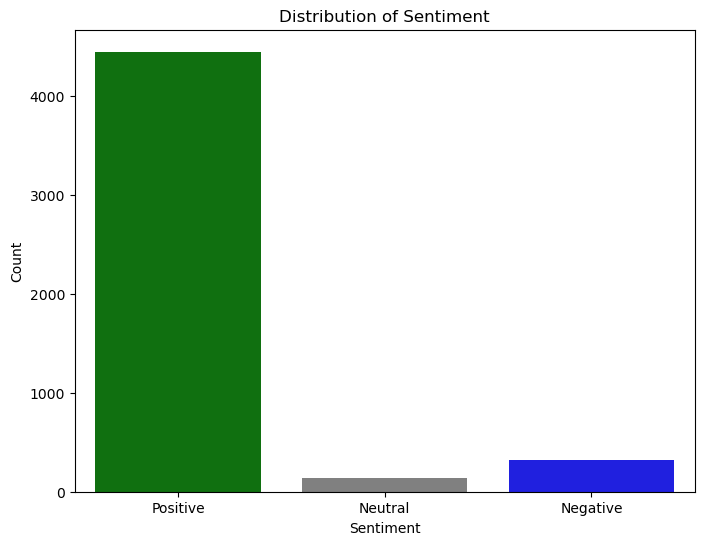

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'blue'})
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Positive', 'Neutral', 'Negative'])
plt.show()

<Figure size 1000x600 with 0 Axes>

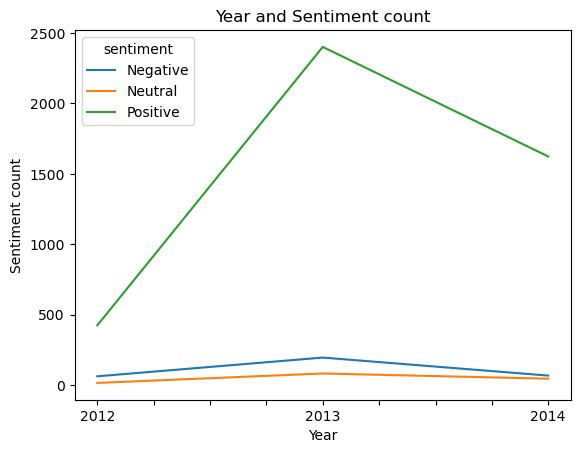

In [109]:
# Plotting the time series analysis with sentiment names
plt.figure(figsize=(10, 6))
df.groupby(['year', 'sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

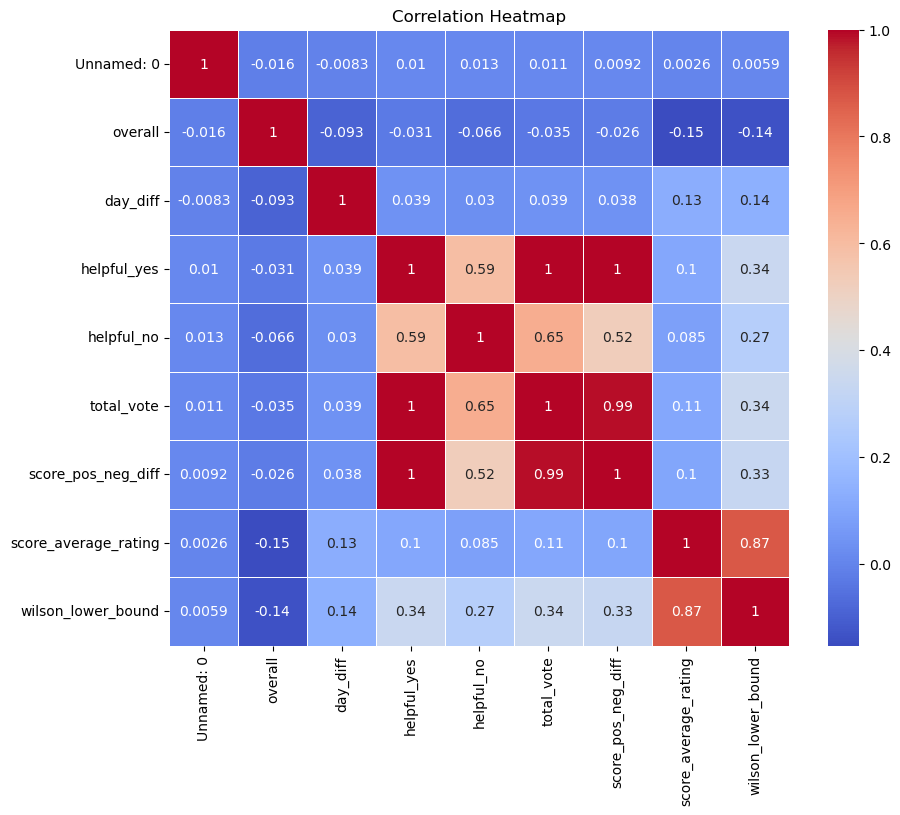

In [53]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

In [54]:
# One-hot encoding for 'reviewerName'


# Encode 'reviewerName' using one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
reviewer_name_encoded = onehot_encoder.fit_transform(df[['reviewerName']])

# Converts the encoded array into a DataFrame
reviewer_name_df = pd.DataFrame(reviewer_name_encoded, columns=[f'reviewer_{i}' for i in range(reviewer_name_encoded.shape[1])])

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, reviewer_name_df], axis=1)

# Drop the original 'reviewerName' column as it's no longer needed
df_encoded.drop(['reviewerName'], axis=1, inplace=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   Unnamed: 0  overall                                         reviewText  \
1         1.0      5.0  Purchased this for my device, it worked as adv...   
2         2.0      4.0  it works as expected. I should have sprung for...   
3         3.0      5.0  This think has worked out great.Had a diff. br...   
4         4.0      5.0  Bought it with Retail Packaging, arrived legit...   
5         5.0      5.0  It's mini storage.  It doesn't do anything els...   

   day_diff  helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
1     409.0          0.0         0.0         0.0                 0.0   
2     715.0          0.0         0.0         0.0                 0.0   
3     382.0          0.0         0.0         0.0                 0.0   
4     513.0          0.0         0.0         0.0                 0.0   
5     588.0          0.0         0.0         0.0                 0.0   

   score_average_rating  wilson_lower_bound  ... reviewer_4584 reviewer_4585  \
1                   0.0 

In [55]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Join tokens back into text
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

df['reviewText'] = df['reviewText'].apply(clean_text)

In [56]:
# Encoding the 'sentiment' column
label_encoder = LabelEncoder() 
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(2,2))
X = tfidf_vectorizer.fit_transform(df['reviewText'])
y = df['sentiment']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [58]:
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Naive Bayes': BernoulliNB()
}


In [59]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {accuracy}")

Logistic Regression Test Accuracy: 0.8982912937347437
Decision Tree Test Accuracy: 0.8673718470301057
KNN Test Accuracy: 0.8982912937347437
SVC Test Accuracy: 0.8982912937347437
Naive Bayes Test Accuracy: 0.8795768917819365


In [60]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {accuracy}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))

Logistic Regression Test Accuracy: 0.8982912937347437
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.00      0.00      0.00        32
           2       0.90      1.00      0.95      1104

    accuracy                           0.90      1229
   macro avg       0.30      0.33      0.32      1229
weighted avg       0.81      0.90      0.85      1229

Confusion Matrix for Logistic Regression:
[[   0    0   93]
 [   0    0   32]
 [   0    0 1104]]
Decision Tree Test Accuracy: 0.869812855980472
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.36      0.38      0.37        93
           1       0.13      0.12      0.13        32
           2       0.94      0.93      0.93      1104

    accuracy                           0.87      1229
   macro avg       0.48      0.48      0.48      1229
weighte

In [110]:
# Hyperparameter tuning for SVC using RandomizedSearchCV

# Reduce the size of the parameter grid
param_dist_svc = {
    'C': np.logspace(-3, 2, 6),    # Reduce values for regularization parameter
    'gamma': np.logspace(-3, 2, 6), # Reduce values for kernel coefficient
    'kernel': ['rbf', 'linear']    # Reduced kernel types
}

# Instantiate the SVC model
svc_model = SVC()
# Reduce the number of iterations
n_iter = 5
# Instantiate RandomizedSearchCV with parallel processing
random_search_svc = RandomizedSearchCV(estimator=svc_model, param_distributions=param_dist_svc, cv=5, n_iter=n_iter, n_jobs=-1)
random_search_svc.fit(X_train, y_train)
# Retrieve the best parameters found by RandomizedSearchCV
best_params_svc = random_search_svc.best_params_
print("Best Parameters for SVC:", best_params_svc)
best_svc_model = random_search_svc.best_estimator_

# Evaluate the best model on the test set
y_pred_svc = best_svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy with Best Parameters (SVC):", accuracy_svc)

Best Parameters for SVC: {'kernel': 'linear', 'gamma': 1.0, 'C': 1.0}
Accuracy with Best Parameters (SVC): 0.9007323026851098


In [61]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


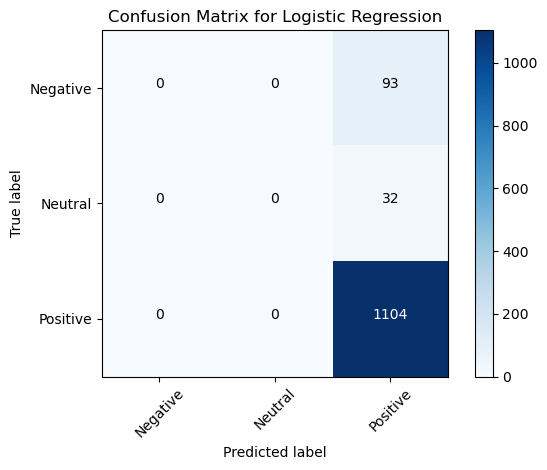

In [62]:
# Find the model with the highest accuracy
max_accuracy_model_name = max(models, key=lambda k: accuracy_score(y_test, models[k].predict(X_test)))

# Plot the confusion matrix for the model with the highest accuracy
cm = confusion_matrix(y_test, models[max_accuracy_model_name].predict(X_test))
plt.figure()
plot_confusion_matrix(cm, classes=['Negative', 'Neutral', 'Positive'], title=f'Confusion Matrix for {max_accuracy_model_name}')
plt.show()

In [63]:
# Save the model with the highest accuracy
joblib.dump(models[max_accuracy_model_name], 'best_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [112]:
# Assuming 'new_data' is the new data for which you want to make predictions
new_data = [input("Enter a new review text: ")]
# Load the trained model and vectorizer
loaded_model = joblib.load('best_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
# Preprocess the new data using the loaded vectorizer
X_new = loaded_vectorizer.transform(new_data)
# Make predictions using the loaded model
predictions = loaded_model.predict(X_new)
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
predicted_sentiment = sentiment_labels[predictions[0]]
print("Predicted sentiment for the new data:", predicted_sentiment)

Enter a new review text: the product is very good
Predicted sentiment for the new data: Positive
